MLP using Tensorflow:

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Epoch: 0001 cost =  47.241976976
Epoch: 0002 cost =  9.057781520
Epoch: 0003 cost =  4.882578544
Epoch: 0004 cost =  3.625120582
Epoch: 0005 cost =  2.893838376
Epoch: 0006 cost =  2.446806705
Epoch: 0007 cost =  2.083842305
Epoch: 0008 cost =  2.080920758
Epoch: 0009 cost =  1.847191010
Epoch: 0010 cost =  1.620541118
Epoch: 0011 cost =  1.308648376
Epoch: 0012 cost =  1.316762533
Epoch: 0013 cost =  1.105023429
Epoch: 0014 cost =  1.043804603
Epoch: 0015 cost =  0.920442892
Epoch: 0016 cost =  0.643149915
Epoch: 0017 cost =  0.880799121
Epoch: 0018 cost =  0.794367008
Epoch: 0019 cost =  0.731564937
Epoch: 0020 cost =  0.675450329
Epoch: 0021 cost =  0.454540418
Epoch: 0022 cost =  0.553106377
Epoch: 0023 cost =  0.510945770
Epoch: 0024 cost =  0.390329542
Epoch: 0025 cost =  0.373528938
Accuracy:  0.9674
Label: [4]
Prediction [4]


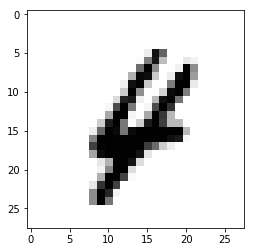

In [7]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32,[None,784], name = 'X')
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32,[None,10], name = 'Y')

# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([784,256]), name = 'W1')
b1 = tf.Variable(tf.random_normal([256]), name = 'b1')
A1 = tf.nn.relu(tf.matmul(X,W1)+b1, name = 'A1')

W2 = tf.Variable(tf.random_normal([256,256]), name = 'W2')
b2 = tf.Variable(tf.random_normal([256]), name = 'b2')
A2 = tf.nn.relu(tf.matmul(A1,W2)+b2, name = 'A2')

W3 = tf.Variable(tf.random_normal([256,10]), name = 'W3')
b3 = tf.Variable(tf.random_normal([10]), name = 'b3')
# Hypothesis (using softmax)
hypothesis = tf.matmul(A2,W3)+b3

cost = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis,labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)

train = optimizer.minimize(cost)

#Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

#parameters
training_epochs = 25
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    #Initialize TensorFlow varaibles
    sess.run(tf.global_variables_initializer())
    #Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        for i in range(total_batch):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train,cost],
                                   feed_dict={X:X_batch,Y:Y_batch})
            avg_cost += cost_val/ total_batch
        print('Epoch:','%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, 
                                      feed_dict={X:mnist.test.images, Y: mnist.test.labels}))
    # Get one and predict
    r = random.randint(0,mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction",sess.run(tf.arg_max(hypothesis, 1), feed_dict={X:mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()